In [32]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

In [39]:
#getting the training data
original_training=pd.read_csv(".\\train_data_1.csv")

copy_x=original_training.copy()
del copy_x['Id']
del copy_x['Type']
del copy_x['Transaction_type']
del copy_x['Payee']
del copy_x['Transaction_date']


copy_x.head()

,Payer,Amount
0,tempCustomer@LOFC@12155599,100.25
1,tempCustomer@LOFC@12155599,1000.25
2,tempCustomer@LOFC@12155599,1000.25
3,tempCustomer@LOFC@12155599,1000.25
4,tempCustomer@LOFC@12155599,1000.25


In [31]:
#getting the testing data
original_testing=pd.read_csv(".\\test_data.csv")

test_x=original_testing.copy()
test_x.head()


,17691,INTERNAL,CUSTOMER_MERCHANT,roshan1@CLC@1,acc.tfc@CLC@1,23,6/28/2017 9:51
0,17692,NaN,VER,79f54bdaeb2965fb1ea439dcda850474e2ab7e3b75ca86...,116843v2isidm5uq5mtf0g637ta48v030005,5.79,6/28/2017 11:28
1,17693,NaN,VER,79f54bdaeb2965fb1ea439dcda850474e2ab7e3b75ca86...,116843v2isidm5uq5mtf0g637ta48v030005,8.68,6/28/2017 11:28
2,17694,NaN,REV-VER,116843v2isidm5uq5mtf0g637ta48v030005,1168436af993533r13ckgu4mpm6a1oub0016,5.79,6/28/2017 11:28
3,17695,NaN,REV-VER,116843v2isidm5uq5mtf0g637ta48v030005,1168436af993533r13ckgu4mpm6a1oub0016,8.68,6/28/2017 11:28
4,17696,NaN,VER,a31821d4f7d14d9a993df3976ebdc6c2cc0bfb5a7fe0e9...,116843v2isidm5uq5mtf0g637ta48v030005,9.35,6/28/2017 13:52


In [7]:
import random
input_2d_x_1=np.array([[random.randint(1,500) for i in range(2)] for j in range(50)],dtype=np.float32)

input_2d_x_2=np.array([[random.randint(400,900) for i in range(2)] for j in range(50)],dtype=np.float32)

input_2d_x_3=np.array([[random.randint(800,1300) for i in range(2)] for j in range(50)],dtype=np.float32)

input_2d_x=np.append(np.append(input_2d_x_1,input_2d_x_2,axis=0),input_2d_x_3,axis=0)

input_2d_x

array([[ 330.,  490.],
       [ 344.,  326.],
       [ 282.,  202.],
       [  98.,  196.],
       [ 463.,  145.],
       [ 273.,   63.],
       [  73.,  414.],
       [   7.,  209.],
       [  64.,  434.],
       [ 447.,  217.],
       [  78.,  295.],
       [ 288.,  401.],
       [ 329.,  452.],
       [  25.,  452.],
       [ 308.,  248.],
       [ 244.,  376.],
       [ 105.,  266.],
       [ 231.,  166.],
       [ 149.,  387.],
       [ 414.,  173.],
       [  28.,  470.],
       [ 388.,  266.],
       [ 112.,  122.],
       [  44.,  386.],
       [ 367.,  104.],
       [ 435.,  239.],
       [ 298.,  203.],
       [ 137.,  127.],
       [ 185.,   34.],
       [ 240.,    6.],
       [  33.,  389.],
       [ 223.,  472.],
       [ 211.,  177.],
       [  85.,  254.],
       [  20.,  382.],
       [ 412.,  260.],
       [ 423.,  109.],
       [ 178.,  322.],
       [ 213.,  302.],
       [   3.,  447.],
       [ 154.,  246.],
       [ 124.,  469.],
       [  45.,  167.],
       [ 39

In [8]:
def input_fn_2d(input_2d) :
    input_tensor=tf.convert_to_tensor(input_2d,dtype=tf.float32)
    
    return(input_tensor,None)


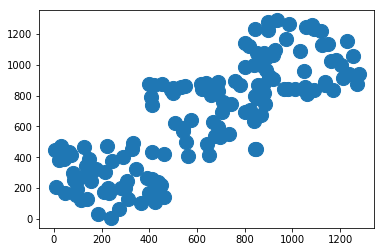

In [9]:
plt.scatter(input_2d_x[:,0],input_2d_x[:,1],s=200)
plt.show()

In [10]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans
from tensorflow.contrib.factorization.python.ops import clustering_ops #clustering_ops class is used to tweak the hyper paras of the model

# Hyper paras

## number of clusters
avg distance to a centriod will decrease when the number of clusters 
## Distance Measures
can choose multiple distance measures

In [25]:
# this is the minimal version
k_means_estimator=kmeans.KMeansClustering(num_clusters=3) 


#below here we are tweaking the output more buy hyper-paras
#k_means_estimator=kmeans.KMeansClustering(num_clusters=3,use_mini_batch=False,relative_tolerance=1)



fit=k_means_estimator.fit( input_fn=lambda :input_fn_2d(input_2d_x) , steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B50926FE48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\user\\AppData\\Local\\Temp\\tmph7kjmxz0'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\user\AppData\Local\Temp\tmph7kjmxz0\mod

In [26]:
clusters_2d=k_means_estimator.clusters()
print(clusters_2d)

[[974.5136  994.3566 ]
 [215.13893 264.11664]
 [602.19745 669.70184]]


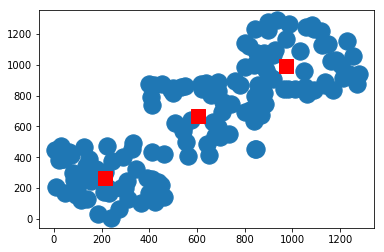

In [27]:
fig=plt.figure()
axl=fig.add_subplot(111)
#original data
axl.scatter(input_2d_x[:,0],input_2d_x[:,1],s=300,marker='o')
#clustered data
axl.scatter(clusters_2d[:,0],clusters_2d[:,1],c='r',s=200,marker='s')

plt.show()


In [16]:
k_means_estimator.get_params()

{'params': {'num_clusters': 3,
  'training_initial_clusters': 'random',
  'distance_metric': 'squared_euclidean',
  'random_seed': 0,
  'use_mini_batch': True,
  'mini_batch_steps_per_iteration': 1,
  'kmeans_plus_plus_num_retries': 2,
  'relative_tolerance': None}}

In [28]:
#now let's predict a sample

ex_2d_x=np.array([[400,400]],dtype=np.float32)
predict=k_means_estimator.predict(input_fn=lambda:input_fn_2d(ex_2d_x),as_iterable=False)
print("\n",clusters_2d,"\n")
print(predict)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmph7kjmxz0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

 [[974.5136  994.3566 ]
 [215.13893 264.11664]
 [602.19745 669.70184]] 

{'all_scores': array([[683325.6  ,  52637.92 , 113622.875]], dtype=float32), 'cluster_idx': array([1], dtype=int64)}
